In [2]:
from google_play_scraper import app, reviews_all
import pandas as pd

In [6]:
app_id = 'com.facebook.katana'

In [7]:
# Mendapatkan informasi aplikasi
app_info = app(app_id)
print("App Info:", app_info)

App Info: {'title': 'Facebook', 'description': "Where real people propel your curiosity. Whether you’re thrifting gear, showing a reel to that group who gets it, or sharing laughs over fun images reimagined by AI, Facebook helps you make things happen like no other social network.\r\n\r\nExplore and expand your interests: \r\n* Ask Meta AI to search topics that matter to you, and get instant results more interactive than just text\r\n* Shop Marketplace for deals and hidden gems to nurture your hobbies\r\n* Personalize your Feed to see more of what you like, less of what you don’t\r\n* Dive into reels and videos for how-to’s or quick entertainment\r\n\r\nConnect with people and communities:\r\n* Join groups to learn tips from real people who’ve been there, done that\r\n* Turn on sharing to Instagram to save time\r\n* Privately message relatable posts that only your BFF will get or that Reels trend everyone’s talking about\r\n\r\nShare your world:\r\n* Use generative AI to delight friend

In [8]:
# Mendapatkan semua review
reviews = reviews_all(
    app_id,
    sleep_milliseconds=0,  # Menunggu beberapa waktu di antara permintaan untuk menghindari diblokir
    lang='id',  # Bahasa Indonesia
    country='id'  # Negara Indonesia
)

In [ ]:
# Konversi review ke dalam DataFrame
reviews_df = pd.DataFrame(reviews)
reviews_df.to_csv('playstore_reviews.csv', index=False)

In [3]:
facebookReviews  = pd.read_csv('playstore_reviews.csv')

In [4]:
facebookReviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,62d03ac8-3292-4673-9e92-23052e820df3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Facebook tuh klo mode gratis gk bisa lama digu...,1,0,436.0.0.35.101,2024-08-06 21:31:11,NaN,NaN,436.0.0.35.101
1,8c4b1396-aeb6-4251-b3b8-524d6decfc29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keren,5,0,NaN,2024-08-06 21:29:59,NaN,NaN,NaN
2,433768f1-4325-4077-82b0-e7f111286250,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,475.1.0.46.82,2024-08-06 21:29:21,NaN,NaN,475.1.0.46.82
3,103280b4-cf1f-448f-9d1d-c3c00511397f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,4,0,NaN,2024-08-06 21:27:31,NaN,NaN,NaN
4,2c8c9cb4-d674-4a56-b322-02f4b411f344,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍👍👍👍,5,0,NaN,2024-08-06 21:27:17,NaN,NaN,NaN


In [5]:
facebook = facebookReviews[['content', 'score']]

In [6]:
facebook.head()

,content,score
0,Facebook tuh klo mode gratis gk bisa lama digu...,1
1,Keren,5
2,oke,5
3,Mantap,4
4,👍👍👍👍,5


In [7]:
facebook.shape

(598500, 2)

In [8]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598500 entries, 0 to 598499
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  598494 non-null  object
 1   score    598500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


In [9]:
facebook.isnull().sum()

content    6
score      0
dtype: int64

In [10]:
facebook = facebook.dropna()

In [11]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase the text
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('indonesian')) 
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

In [13]:
#melakukan perubahan dan menambahkan kolom baru pada kolom yang berhasil di bersihkan
facebook['contents'] = facebook['content'].apply(preprocess_text)

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

# Membuat stemmer menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengumpulkan semua kata unik dalam dataset
unique_words = set()
facebook['contents'].str.split().apply(unique_words.update)

# Membuat kamus kata yang sudah di-stem
stemmed_words = {word: stemmer.stem(word) for word in tqdm(unique_words, desc="Stemming words")}

# Fungsi untuk menerapkan stemming menggunakan kamus
def stemWithDict(text):
    return ' '.join([stemmed_words.get(word, word) for word in text.split()])
 
# Terapkan stemming ke kolom 'contents'
facebook['contents'] = facebook['contents'].apply(stemWithDict)


Stemming words: 100%|██████████| 178591/178591 [4:01:44<00:00, 12.31it/s]  


In [15]:
facebook.sample(11)

,content,score,contents
282859,B aja,1,b aja
173134,"Ayak"" waek main kunci akun",1,ayak waek main kunci akun
171678,Anehhhh bgt guys,2,anehhhh bgt guys
195440,Saya suka dengan fb namun kenapa fb nya.kalo b...,1,suka fb fb nyakalo baik bug buang koneksi nya ...
313946,Mantap,5,mantap
151384,"Market place saya kok gak bisa dibuka, kenapa?",4,market place gak buka
14965,ok dahhh,5,ok dahhh
265020,Trimakasi,5,trimakasi
440545,Kenapa facebook error terus.bikin darah tinggi..,5,facebook error terusbikin darah
345705,FB TAAAAIKKKKK,1,fb taaaaikkkkk


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_33544\3152927536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=facebook, palette='mako')


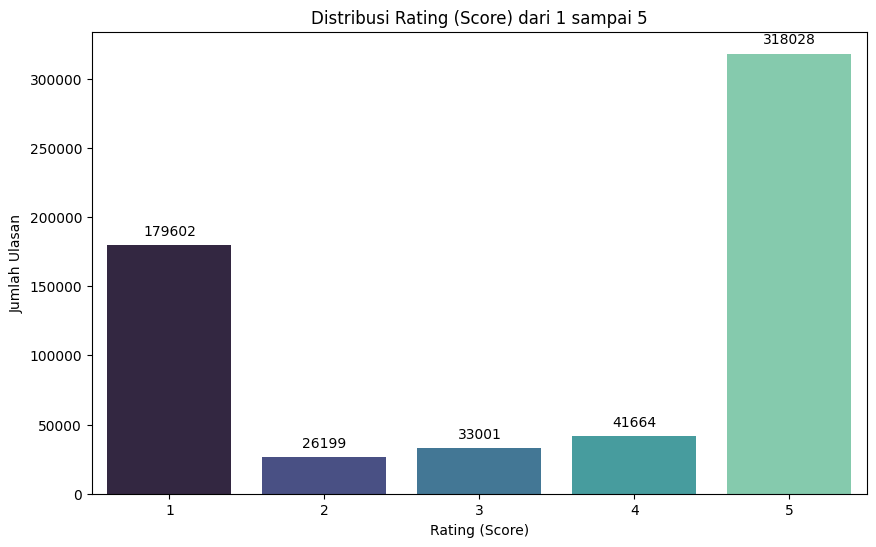

In [17]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='score', data=facebook, palette='mako')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribusi Rating (Score) dari 1 sampai 5')
plt.xlabel('Rating (Score)')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [18]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(facebook['contents'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    10   30  a2f  abis  account   ad  adil  admin  agama   ah  ...  yah  \
0  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0    0.0  0.0  ...  0.0   
1  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0    0.0  0.0  ...  0.0   
2  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0    0.0  0.0  ...  0.0   
3  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0    0.0  0.0  ...  0.0   
4  0.0  0.0  0.0   0.0      0.0  0.0   0.0    0.0    0.0  0.0  ...  0.0   

   yahudi  yes   yg  yng  you  your  youtube  zionis  zuckerberg  
0     0.0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
1     0.0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
2     0.0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
3     0.0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  
4     0.0  0.0  0.0  0.0  0.0   0.0      0.0     0.0         0.0  

[5 rows x 1000 columns]


In [19]:
rating3 = facebook[facebook['score'] == 3]

In [20]:
rating3.head(11)

,content,score,contents
24,mantap,3,mantap
35,Mohon di bantu facebook nya biyar lancar,3,mohon bantu facebook nya biyar lancar
53,seru banget,3,seru banget
64,mantap,3,mantap
80,"Kenapa ini fb, apk nya eror terus",3,fb apk nya eror
85,Kenapa FB saya gada tombol pemberitahuannya ka...,3,fb gada tombol pemberitahuannya kalo yg coment...
92,setatus tidk muncul di beranda,3,setatus tidk muncul beranda
110,Knp banyak sekali 4no disini,3,knp 4no
115,"Fb saya kok aneh yaaa, fitur beranda pemberita...",3,fb aneh yaaa fitur beranda pemberitahuan teman...
124,Ekstra bonus maksudnya gimana min cara kerjanya..,3,ekstra bonus maksud gimana min kerja


In [21]:
# Fungsi untuk memberi label berdasarkan rating / score
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Tambahkan kolom label
facebook['label'] = facebook['score'].apply(label_sentiment)

In [22]:
facebook.sample(11)

,content,score,contents,label
586737,Makin parah knapa ini FACEBOOK......,1,parah knapa facebook,negative
12647,Media sosial yang sungguh Luar Biasa,5,media sosial sungguh,positive
589777,Tidak netrall....,1,netrall,negative
108526,Buruk,1,buruk,negative
76427,Update th ini jelek market place nya di block,1,update th jelek market place nya block,negative
237613,Ok,4,ok,positive
403772,Mantap,5,mantap,positive
323242,Facebook knp? Ko setiap di buka langsung close...,1,facebook knp ko buka langsung close,negative
200052,Fasilitas berbagi pengalaman dan ilmu,5,fasilitas bagi alam ilmu,positive
419333,Wow,5,wow,positive


C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_33544\1452771361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=facebook, palette='mako')


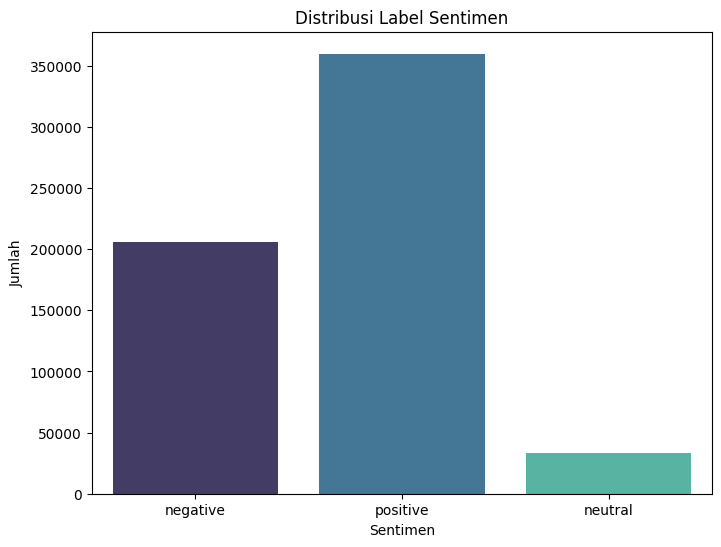

In [23]:
# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=facebook, palette='mako')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, facebook['label'], test_size=0.2, random_state=42)

In [33]:
# # Terapkan SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
# Train Naive Bayes classifier
nbModel = MultinomialNB()
nbModel.fit(X_train, y_train)

MultinomialNB()

In [35]:
# Predict sentiment
y_pred = nbModel.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7827968487623121
              precision    recall  f1-score   support

    negative       0.74      0.71      0.73     41121
     neutral       0.30      0.00      0.00      6659
    positive       0.80      0.90      0.85     71919

    accuracy                           0.78    119699
   macro avg       0.61      0.54      0.53    119699
weighted avg       0.75      0.78      0.76    119699



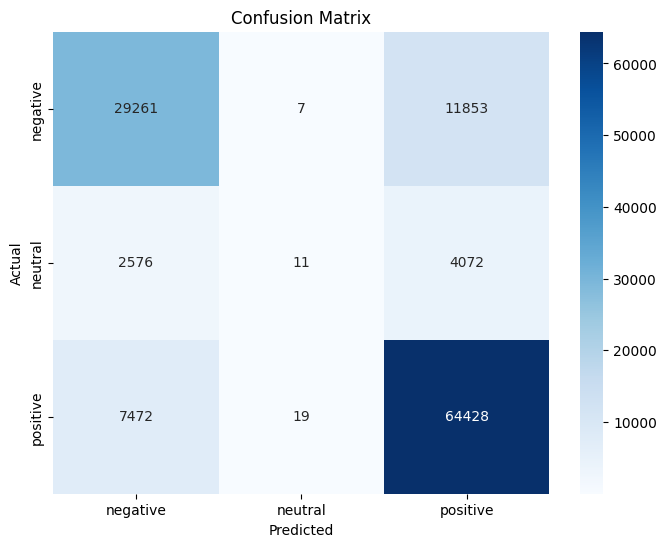

In [37]:
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()